In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../visualization_data/BrentOilPrices.csv')

In [3]:
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [4]:
def bop_data_reader(df):
    month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_dict = {month_list[m_idx]:m_idx+1 for m_idx in range(len(month_list))}

    dataset = []
    for data in np.array(df):
        price = data[-1]
        date = data[0]

        try:
            D, M, Y = date.split(sep='-')
            if int(Y) >= 87:
                M = month_dict[M]
                dataset.append([Y, M, D, price])
        except:
            pass
    dataset = np.array(dataset).astype(np.float)
    return dataset

In [5]:
def get_year_data(dataset, t_year):
    t_idx = np.where(dataset[:, 0] == t_year)
    t_data = dataset[t_idx]
    return t_data

In [6]:
dataset = bop_data_reader(df)
dataset

array([[87.  ,  5.  , 20.  , 18.63],
       [87.  ,  5.  , 21.  , 18.45],
       [87.  ,  5.  , 22.  , 18.55],
       ...,
       [99.  , 12.  , 23.  , 25.11],
       [99.  , 12.  , 29.  , 25.63],
       [99.  , 12.  , 30.  , 24.93]])

## Line plot Basics

### ax.plot(y)

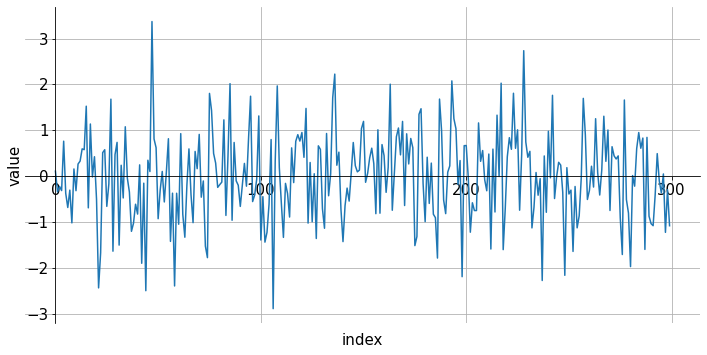

In [7]:
# example 1
y_data = np.random.normal(loc=0, scale=1, size=(300, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_data)
ax.set_xticks(np.arange(301, step=100))
ax.set_title('index', fontsize=15, y=-0.05, va='top')
ax.set_ylabel('value', fontsize=15)
ax.tick_params(labelsize=15)
ax.grid()

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

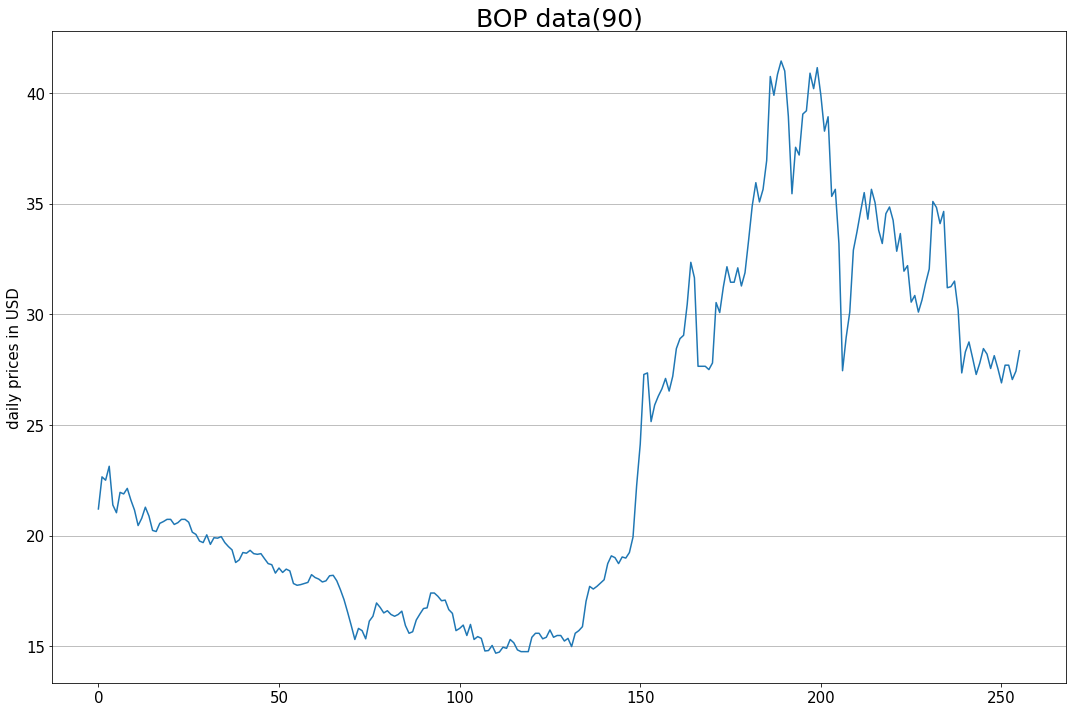

In [8]:
# BrentOilPrices data
t_year = 90
t_year_data = get_year_data(dataset, t_year)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t_year_data[:, -1])
ax.set_title(f"BOP data({t_year})", fontsize=25)
ax.set_ylabel('daily prices in USD', fontsize=15)
ax.tick_params(labelsize=15)
ax.grid(axis='y')

fig.tight_layout()
plt.show()

### ax.plot(x, y)

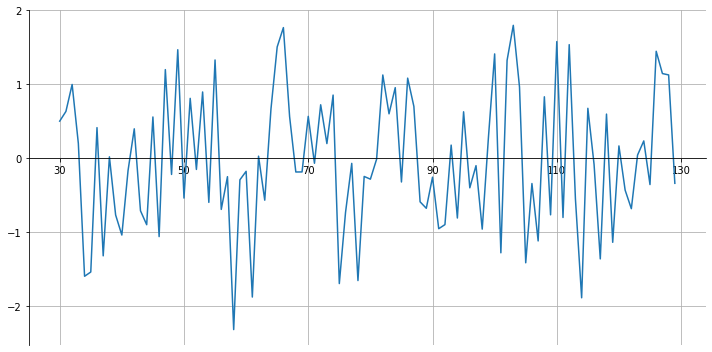

In [9]:
# example 1
n_data = 100
s_idx = 30
x_data = np.arange(s_idx, s_idx+n_data)
y_data = np.random.normal(0, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data,  y_data)
ax.set_xticks(np.arange(s_idx, s_idx+n_data+1, 20))
ax.grid()

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['right', 'top']:
        spine.set_visible(False)
    if spine_loc in ['bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

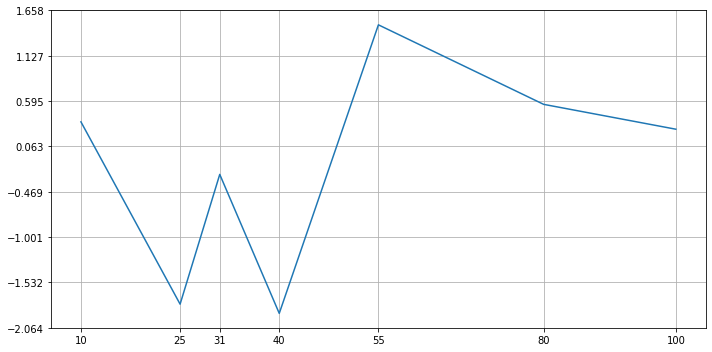

In [10]:
# example 2
x_data = np.array([10, 25, 31, 40, 55, 80, 100])
y_data = np.random.normal(0, 1, (7, ))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_data, y_data)
ax.set_xticks(x_data)
ylim = ax.get_ylim()
ax.set_yticks(np.linspace(ylim[0], ylim[1], 8))
ax.grid()

fig.tight_layout()
plt.show()

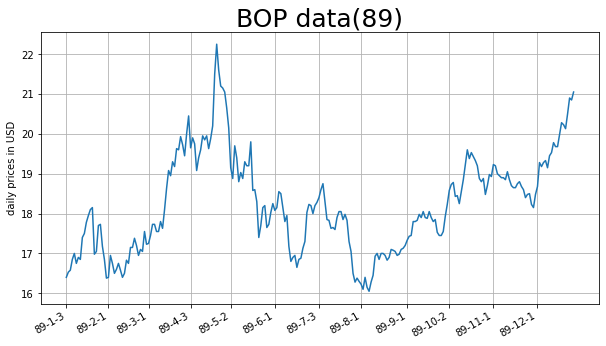

In [11]:
# BrentOilPrices data
t_year = 89
t_year_data = get_year_data(dataset, t_year)

month_start_dict = {m:None for m in range(1, 1+12)}
for data_idx, data in enumerate(t_year_data):
    (Y, M, D), price = data[0:3].astype(np.int), data[-1].astype(np.float)
    if month_start_dict[M] == None:
        month_start_dict[M] = [data_idx, '-'.join(str(i) for i in [Y, M, D])]
first_day_label = np.array(list(month_start_dict.values()))

fig,ax = plt.subplots(figsize=(10 , 5))
x_arange = np.arange(t_year_data.shape[0])
ax.plot(x_arange, t_year_data[:, -1])
ax.set_xticks(first_day_label[:, 0].astype(np.int))
ax.set_xticklabels(first_day_label[:, 1], ha='right', rotation=30)

ax.set_title(f"BOP data({t_year})", fontsize=25)
ax.set_ylabel('daily prices in USD')
ax.grid()

plt.show()

### Several Line Plots on One Ax

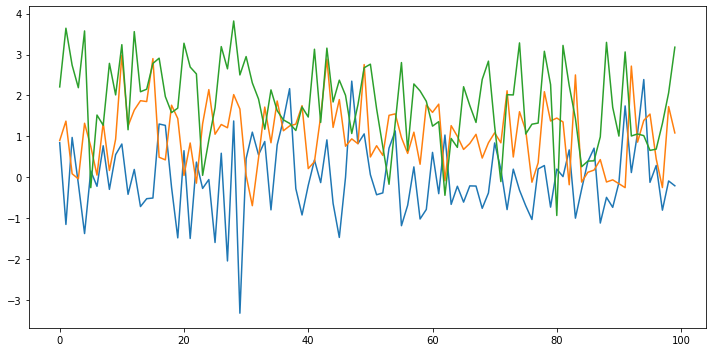

In [12]:
# example 1
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(random_noise1)
ax.plot(random_noise2)
ax.plot(random_noise3)

fig.tight_layout()
plt.show()

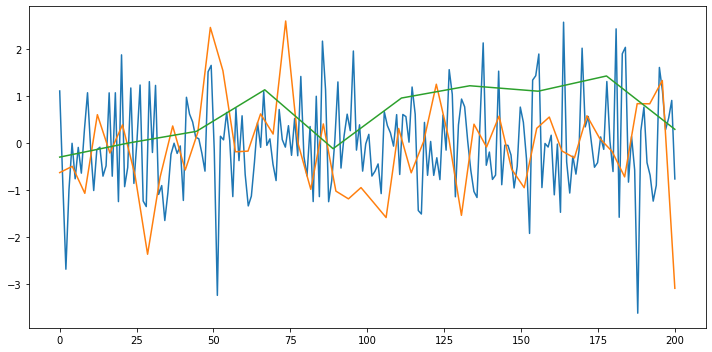

In [13]:
# example 2
n_data1, n_data2, n_data3 = 200, 50, 10

x_data1 = np.linspace(0, 200, n_data1)
x_data2 = np.linspace(0, 200, n_data2)
x_data3 = np.linspace(0, 200, n_data3)

random_noise1 = np.random.normal(0, 1, (n_data1, ))
random_noise2 = np.random.normal(0, 1, (n_data2, ))
random_noise3 = np.random.normal(0, 1, (n_data3, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x_data1, random_noise1)
ax.plot(x_data2, random_noise2)
ax.plot(x_data3, random_noise3)

fig.tight_layout()
plt.show()

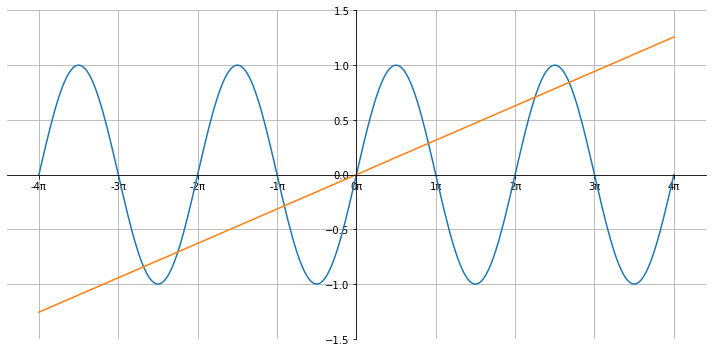

In [14]:
# example 3
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)
linear = 0.1*t

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, sin)
ax.plot(t, linear)
ax.grid()
ax.set_ylim([-1.5, 1.5])

x_ticks = np.arange(-4*PI, 4*PI+0.1, PI)
x_ticklabels = [str(i) + 'π' for i in range(-4, 5)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

for spine_loc, spine in ax.spines.items():
    if spine_loc in ['top', 'right']:
        spine.set_visible(False)
    if spine_loc in ['left', 'bottom']:
        spine.set_position(('data', 0))

fig.tight_layout()
plt.show()

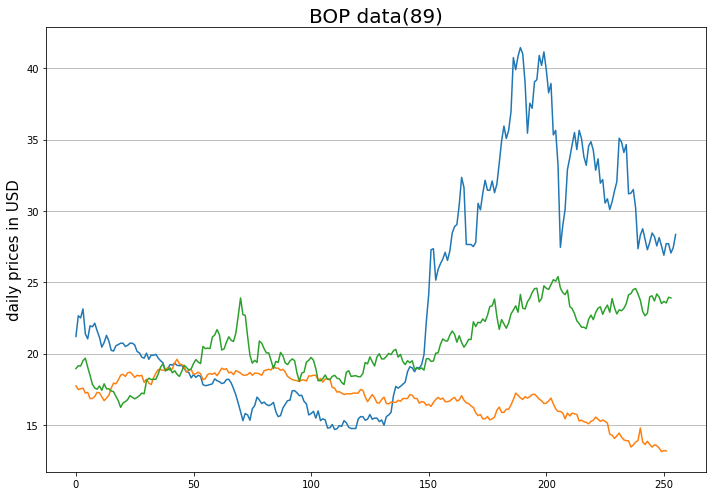

In [15]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    ax.plot(t_year_data[:, -1])

fig, ax = plt.subplots(figsize=(10, 7))

bop_plot(dataset, 90, ax=ax)
bop_plot(dataset, 93, ax=ax)
bop_plot(dataset, 96, ax=ax)

ax.grid(axis='y')
ax.set_title(f"BOP data({t_year})", fontsize=20)
ax.set_ylabel('daily prices in USD', fontsize=15)

fig.tight_layout()
plt.show()

### Several Line Plots on Different Axes

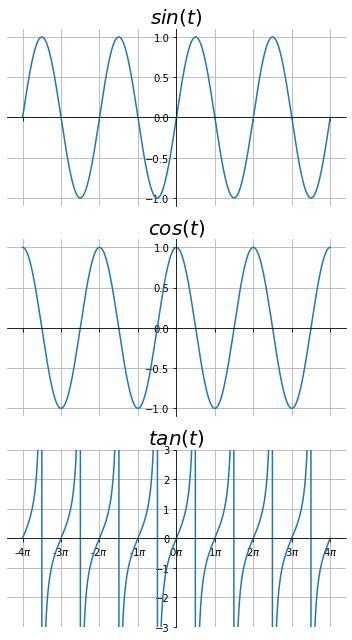

In [16]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 1000)
sin = np.sin(t)
cos = np.cos(t)
tan = np.tan(t)
data = np.vstack([sin, cos, tan])

title_list = [r'$sin(t)$', r'$cos(t)$', r'$tan(t)$']
x_ticks = np.arange(-4*PI, 4*PI+0.1, PI)
x_ticklabels = [str(i) + r'$\pi$' for i in range(-4, 5)]

fig, axes = plt.subplots(3, 1, figsize=(5, 9), sharex=True)

for ax_idx, ax in enumerate(axes.flat):
    ax.plot(t, data[ax_idx])
    ax.set_title(title_list[ax_idx], fontsize=20)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticklabels)
    ax.grid()
    
    for spine_loc, spine in ax.spines.items():
        if spine_loc in ['top', 'right']:
            spine.set_visible(False)
        if spine_loc in ['left', 'bottom']:
            spine.set_position(('data', 0))
    
    if ax_idx == 2:
        ax.set_ylim([-3, 3])

axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels(x_ticklabels)
    
fig.tight_layout()
plt.show()

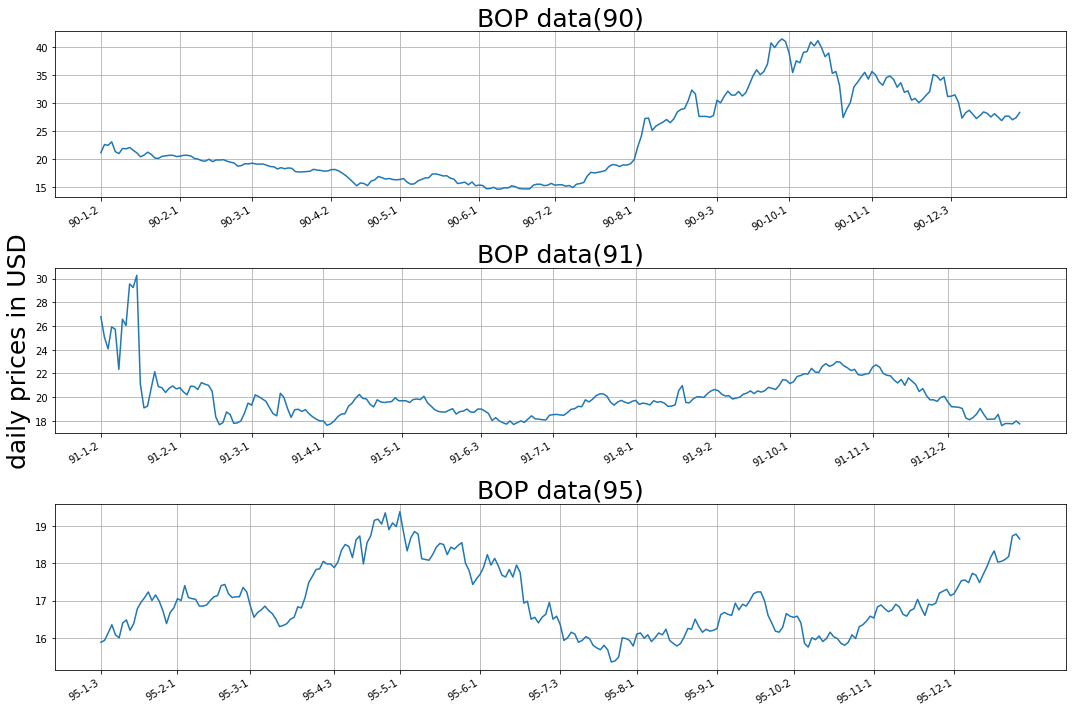

In [17]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    
    month_start_dict = {m:None for m in range(1, 1+12)}
    for data_idx, data in enumerate(t_year_data):
        (Y, M, D), price = data[0:3].astype(np.int), data[-1].astype(np.float)
        if month_start_dict[M] == None:
            month_start_dict[M] = [data_idx, '-'.join(str(i) for i in [Y, M, D])]
    first_day_label = np.array(list(month_start_dict.values()))
    
    x_arange = np.arange(t_year_data.shape[0])
    ax.plot(x_arange, t_year_data[:, -1])
    ax.set_xticks(first_day_label[:, 0].astype(np.int))
    ax.set_xticklabels(first_day_label[:, 1], ha='right', rotation=30)
    ax.set_title(f"BOP data({t_year})", fontsize=25)
    ax.grid()

t_year_list = [90, 91, 95]
fig, axes = plt.subplots(len(t_year_list), 1, figsize=(15, 10))

for ax_idx, ax in enumerate(axes.flat):
    bop_plot(dataset, t_year_list[ax_idx], ax)
    
    if ax_idx ==1:
        ax.set_ylabel('daily prices in USD', fontsize=25)

fig.tight_layout()
plt.show()

### ax.axvline and ax.axhline

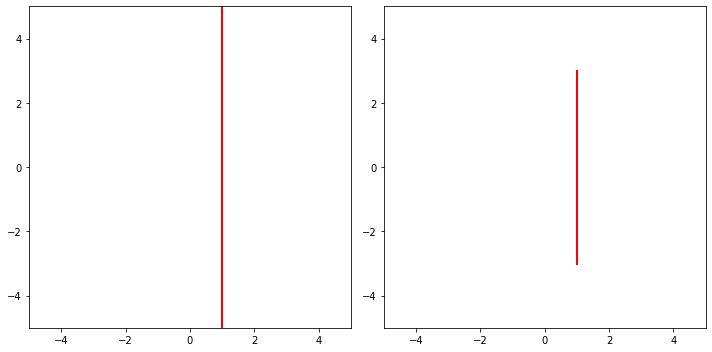

In [18]:
# ax.axvline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])

axes[0].axvline(x=1, color='red', linewidth=2)
axes[1].axvline(x=1, ymin=0.2, ymax=0.8 ,color='red', linewidth=2)

fig.tight_layout()
plt.show()

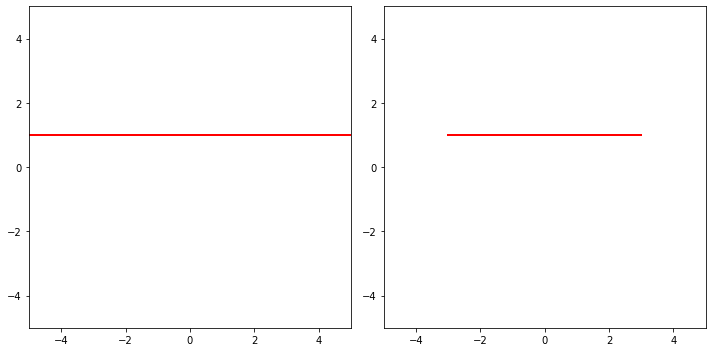

In [19]:
# ax.axhline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])

axes[0].axhline(y=1, color='red', linewidth=2)
axes[1].axhline(y=1, xmin=0.2, xmax=0.8 ,color='red', linewidth=2)

fig.tight_layout()
plt.show()

## Labels and Legend

### Basic Usage

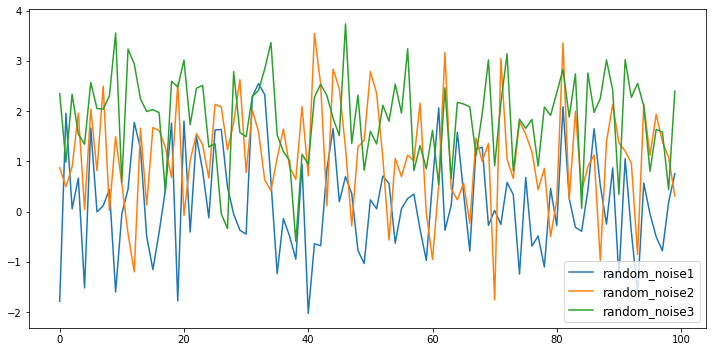

In [20]:
# example 1
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(random_noise1, label='random_noise1')
ax.plot(random_noise2, label='random_noise2')
ax.plot(random_noise3, label='random_noise3')

ax.legend(fontsize=12)

fig.tight_layout()
plt.show()

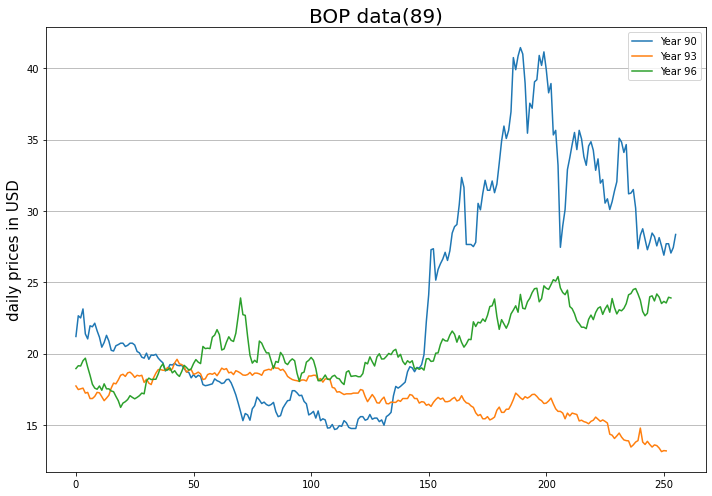

In [21]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    ax.plot(t_year_data[:, -1], label='Year '+str(t_year))

fig, ax = plt.subplots(figsize=(10, 7))

bop_plot(dataset, 90, ax=ax)
bop_plot(dataset, 93, ax=ax)
bop_plot(dataset, 96, ax=ax)

ax.legend()
ax.grid(axis='y')
ax.set_title(f"BOP data({t_year})", fontsize=20)
ax.set_ylabel('daily prices in USD', fontsize=15)

fig.tight_layout()
plt.show()

### Legend Locations
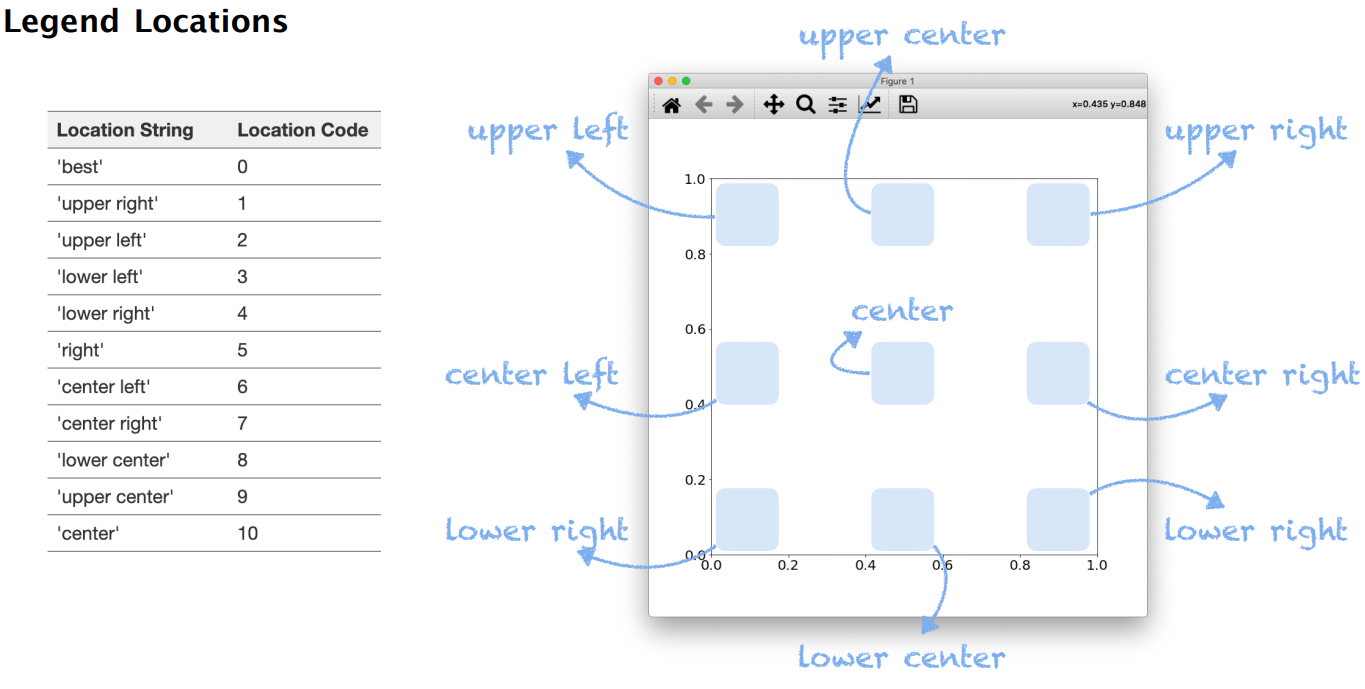

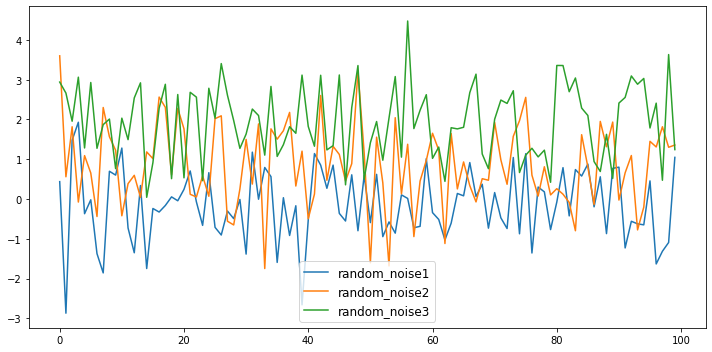

In [22]:
# example 1
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(random_noise1, label='random_noise1')
ax.plot(random_noise2, label='random_noise2')
ax.plot(random_noise3, label='random_noise3')

ax.legend(fontsize=12, loc='lower center')

fig.tight_layout()
plt.show()

### ncol Argument

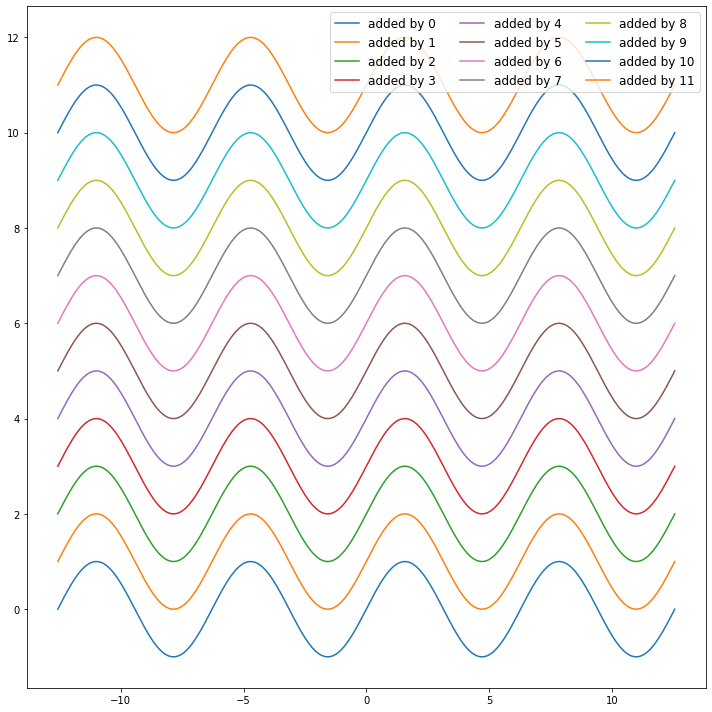

In [23]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))

for ax_idx in range(12):
    label_template = f"added by {ax_idx}"
    ax.plot(t, sin+ax_idx, label=label_template)
ax.legend(fontsize=12, ncol=3)

fig.tight_layout()
plt.show()

### bbox_to_anchor Argument
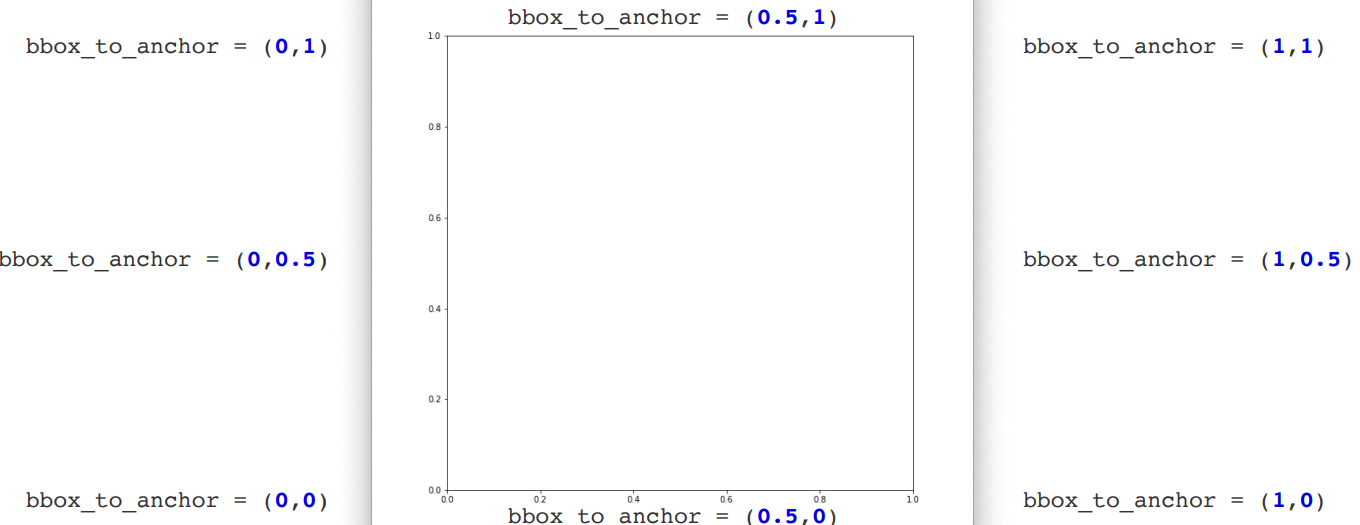
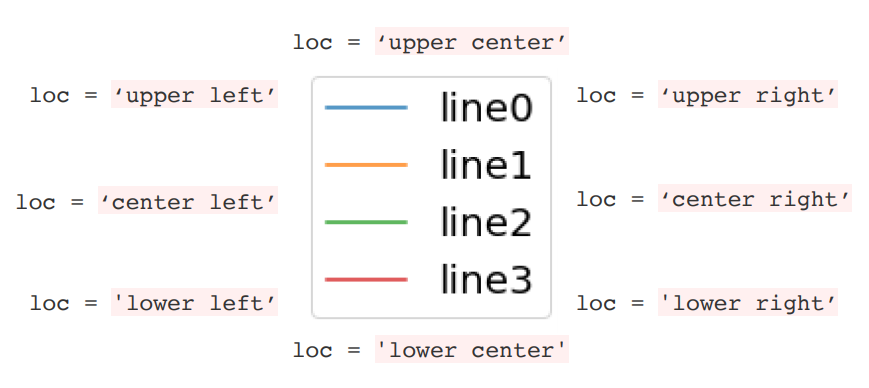

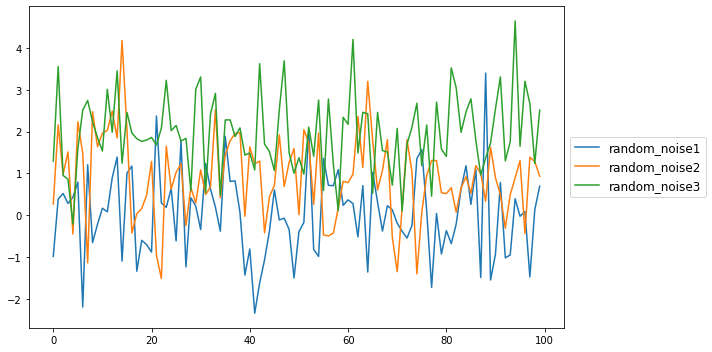

In [24]:
# example 1
n_data = 100

random_noise1 = np.random.normal(0, 1, (n_data, ))
random_noise2 = np.random.normal(1, 1, (n_data, ))
random_noise3 = np.random.normal(2, 1, (n_data, ))

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(random_noise1, label='random_noise1')
ax.plot(random_noise2, label='random_noise2')
ax.plot(random_noise3, label='random_noise3')

ax.legend(fontsize=12, 
          bbox_to_anchor=(1, 0.5), 
         loc='center left')

fig.tight_layout()
plt.show()

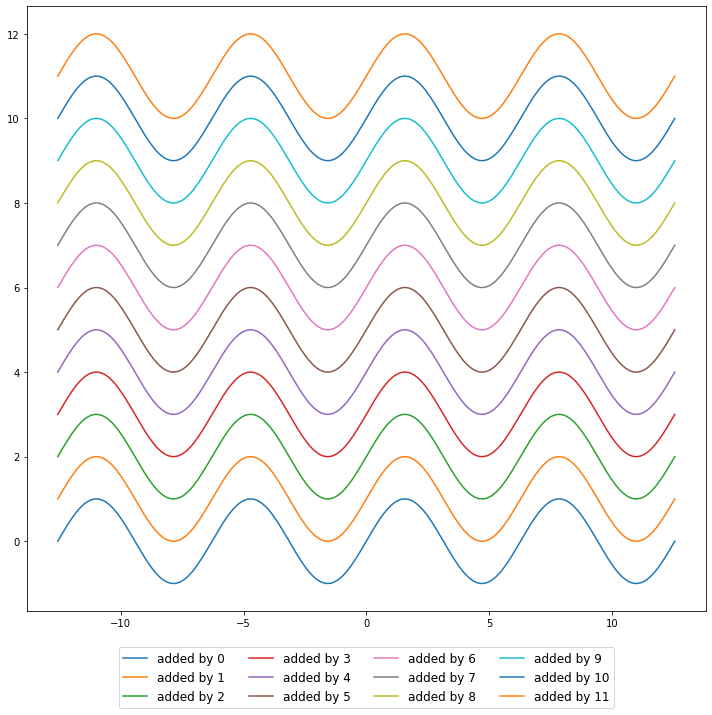

In [25]:
# example 2
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))

for ax_idx in range(12):
    label_template = f"added by {ax_idx}"
    ax.plot(t, sin+ax_idx, label=label_template)
ax.legend(fontsize=12, ncol=4, bbox_to_anchor=(0.5, -0.05), loc='upper center')

fig.tight_layout()
plt.show()

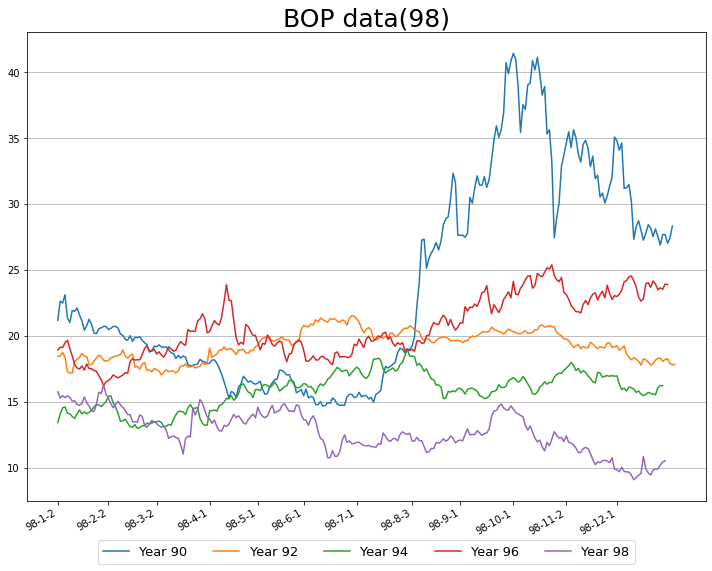

In [26]:
# BrentOilPrices data
def bop_plot(dataset, t_year, ax):
    t_year_data = get_year_data(dataset, t_year)
    
    month_start_dict = {m:None for m in range(1, 1+12)}
    for data_idx, data in enumerate(t_year_data):
        (Y, M, D), price = data[0:3].astype(np.int), data[-1].astype(np.float)
        if month_start_dict[M] == None:
            month_start_dict[M] = [data_idx, '-'.join(str(i) for i in [Y, M, D])]
    first_day_label = np.array(list(month_start_dict.values()))
    
    x_arange = np.arange(t_year_data.shape[0])
    ax.plot(x_arange, t_year_data[:, -1], label=f"Year {t_year}")
    ax.set_xticks(first_day_label[:, 0].astype(np.int))
    ax.set_xticklabels(first_day_label[:, 1], ha='right', rotation=30)
    ax.set_title(f"BOP data({t_year})", fontsize=25)
    ax.grid(axis='y')

t_year_list = [90, 92, 94, 96, 98]
fig, ax = plt.subplots(figsize=(10, 8))

for t_year in t_year_list:
    bop_plot(dataset, t_year, ax)
ax.legend(fontsize=13, bbox_to_anchor=(0.5, -0.07), loc='upper center', ncol=len(t_year_list))    

fig.tight_layout()
plt.show()

## Line Styles and Markers

### Line Styles
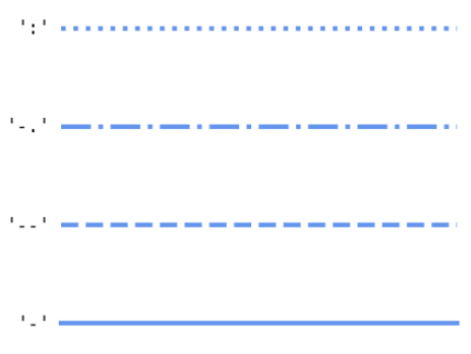

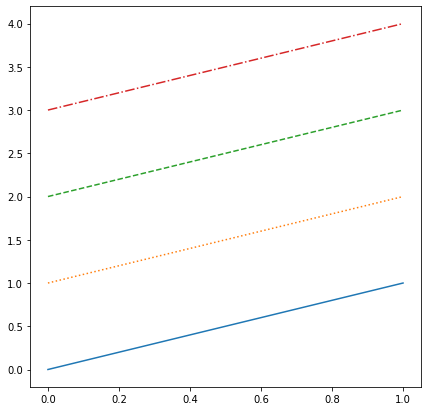

In [27]:
# example 1
x_data = np.array([0, 1])
y_data = x_data

fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x_data, y_data)

ax.plot(x_data, y_data+1,
       linestyle=':')

ax.plot(x_data, y_data+2,
       linestyle='--')

ax.plot(x_data, y_data+3,
       linestyle='-.')

plt.show()

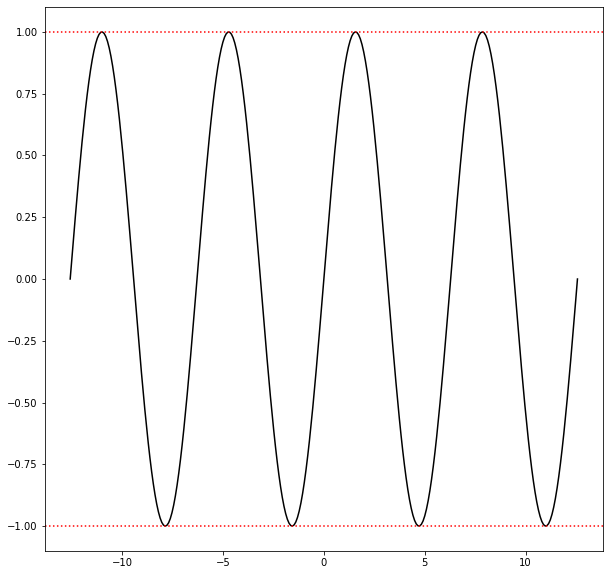

In [28]:
# example 2
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(t, sin, color='black')
ax.axhline(y=1, linestyle=':', color='red')
ax.axhline(y=-1, linestyle=':', color='red')

plt.show()

### Markers

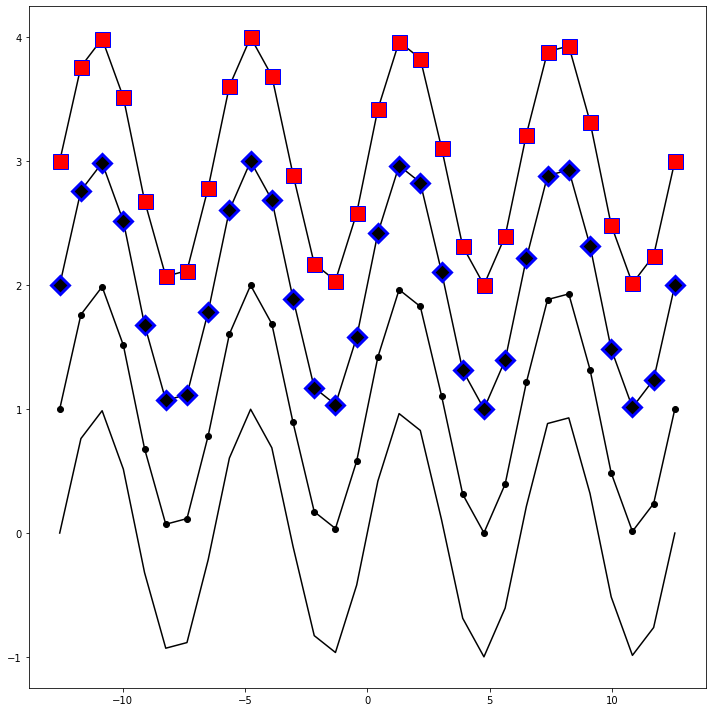

In [29]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 30)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(t, sin, color='black')
ax.plot(t, sin+1, color='black', marker='o')
ax.plot(t, sin+2, color='black', marker='D', markersize=13, markeredgecolor='b', markeredgewidth=3)
ax.plot(t, sin+3, color='black', marker='s', markersize=15, markerfacecolor='r', markeredgecolor='b')

fig.tight_layout()
plt.show()

### Line Styles/Markers with Legend

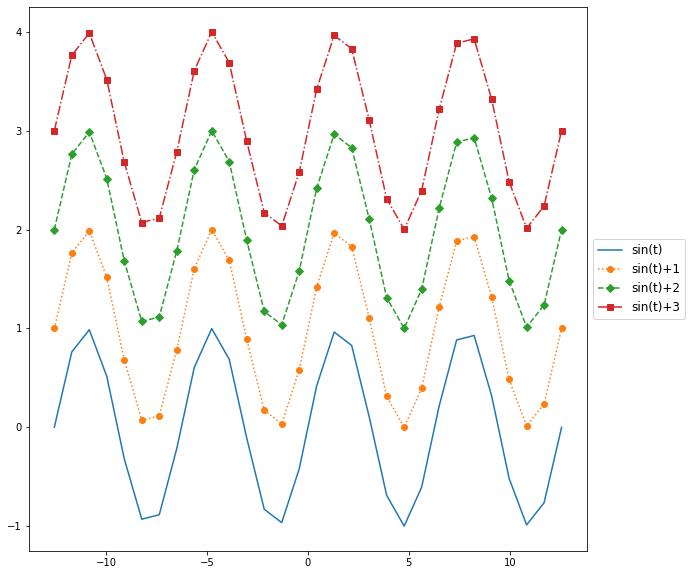

In [30]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 30)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(t, sin, label='sin(t)')
ax.plot(t, sin+1, marker='o', label='sin(t)+1', linestyle=':')
ax.plot(t, sin+2, marker='D', label='sin(t)+2', linestyle='--')
ax.plot(t, sin+3, marker='s', label='sin(t)+3', linestyle='-.')

ax.legend(fontsize=12,
         bbox_to_anchor=(1, 0.5),
         loc='center left')

plt.show()

### fmt(format strings) Argument
fmt = '[color][marker][line]'

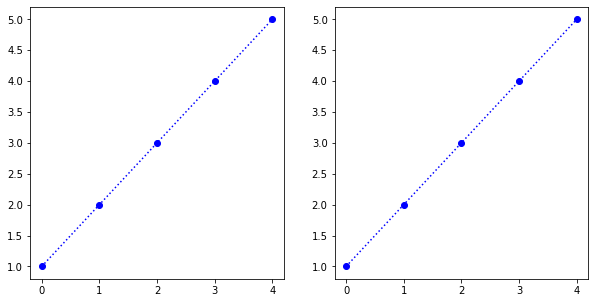

In [31]:
# example 1
x_data = np.array([1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(x_data, color='b', marker='o', linestyle=':')
axes[1].plot(x_data, 'bo:')

plt.show()

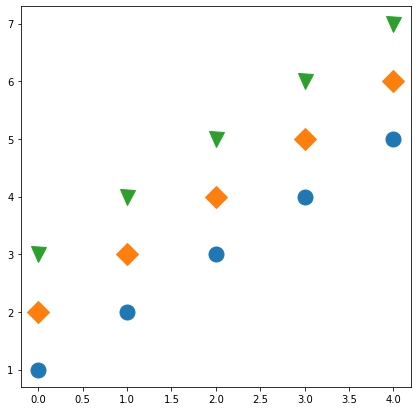

In [32]:
# example 2
x_data = np.array([1, 2, 3, 4, 5])

fig, ax = plt.subplots(figsize=(7, 7))

ax.plot(x_data, 'o', markersize=15)
ax.plot(x_data+1, 'D', markersize=15)
ax.plot(x_data+2, 'v', markersize=15)

plt.show()

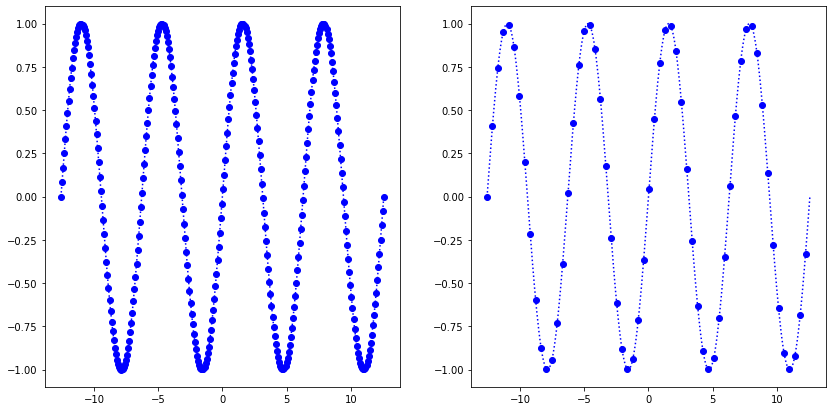

In [33]:
# example 3
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 300)
sin = np.sin(t)

t_mark = t[::5]
sin_mark = np.sin(t_mark)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].plot(t, sin, 'bo:')
axes[1].plot(t, sin, 'b:')
axes[1].plot(t_mark, sin_mark, 'bo')

plt.show()

## Line Filling

### fill_between Basic Usage

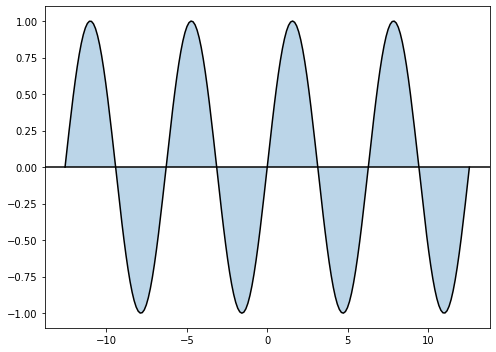

In [38]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 200)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, sin, color='black')
ax.axhline(y=0, color='black')

ax.fill_between(t, sin, alpha=0.3)

fig.tight_layout()
plt.show()

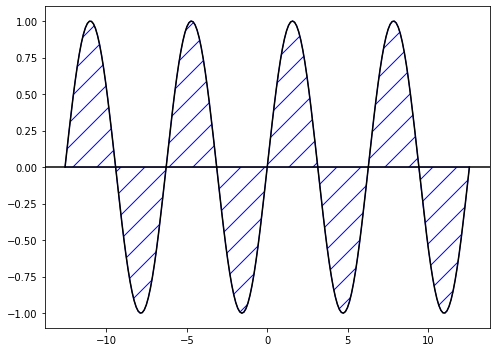

In [48]:
# example 2
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 200)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, sin, color='black')
ax.axhline(y=0, color='black')

ax.fill_between(t, sin, 
                facecolor='white',
               hatch='/',
               edgecolor='blue')

fig.tight_layout()
plt.show()

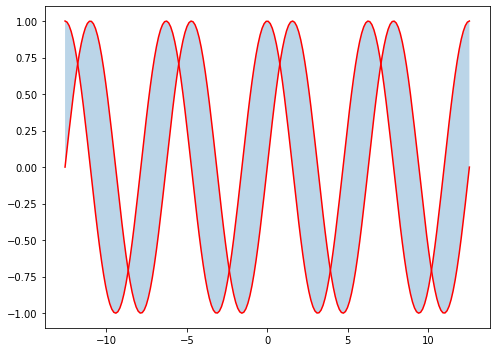

In [56]:
# example 3
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 200)
sin = np.sin(t)
cos = np.cos(t)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, sin, color='red')
ax.plot(t, cos, color='red')

ax.fill_between(t, sin, cos,
               alpha=0.3)

fig.tight_layout()
plt.show()

### where Argument

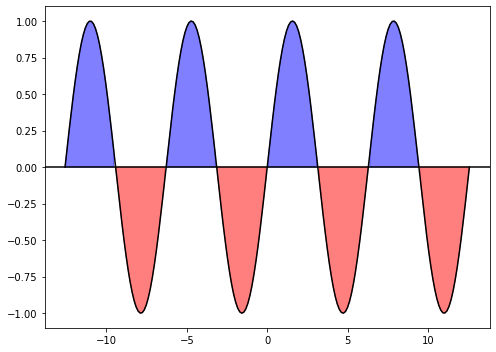

In [66]:
# example 1
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 200)
sin = np.sin(t)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, sin, color='black')
ax.axhline(y=0, color='black')

ax.fill_between(t, sin, alpha=0.5,
                color='blue',
                where=sin>0) # sin >0 부분 파란색

ax.fill_between(t, sin, alpha=0.5,
                color='red',
                where=sin<0) # sin >0 부분 빨간색

fig.tight_layout()
plt.show()

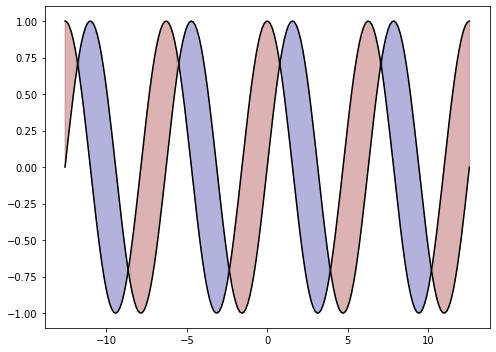

In [70]:
# example 2
PI = np.pi
t = np.linspace(-4*PI, 4*PI, 200)
sin = np.sin(t)
cos = np.cos(t)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(t, sin, color='black')
ax.plot(t, cos, color='black')

ax.fill_between(t, sin, cos, alpha=0.3,
                color='darkblue',
                where=sin>=cos)

ax.fill_between(t, sin, cos, alpha=0.3,
                color='darkred',
                where=sin<cos)

fig.tight_layout()
plt.show()

### interpolate Argument

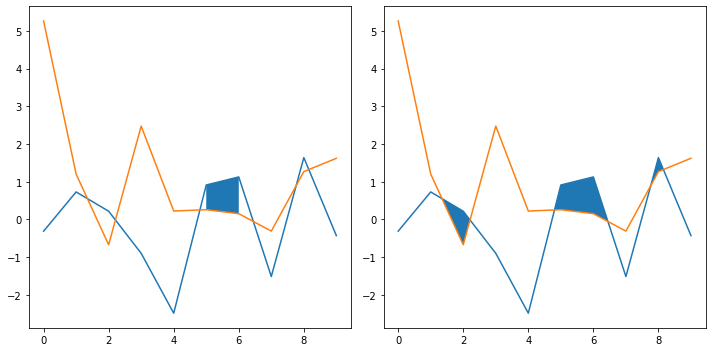

In [78]:
# example 1
np.random.seed(6)

n_data = 10
data_idx = np.arange(0, n_data)
noise1 = np.random.normal(0, 1, (n_data, ))
noise2 = np.random.normal(0, 2, (n_data, ))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(data_idx, noise1)
axes[0].plot(data_idx, noise2)
axes[0].fill_between(data_idx, noise1, noise2,
                    where=noise1>=noise2)

axes[1].plot(data_idx, noise1)
axes[1].plot(data_idx, noise2)
axes[1].fill_between(data_idx, noise1, noise2,
                    where=noise1>=noise2,
                    interpolate=True)

fig.tight_layout()
plt.show()

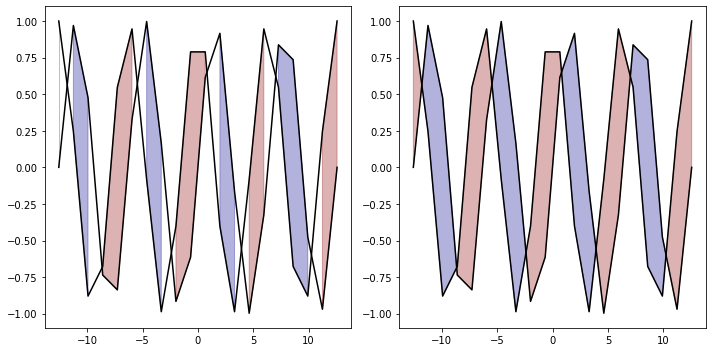

In [82]:
# example 2

PI = np.pi
t = np.linspace(-4*PI, 4*PI, 20)
sin = np.sin(t)
cos = np.cos(t)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(t, sin, color='black')
axes[0].plot(t, cos, color='black')

axes[0].fill_between(t, sin, cos, alpha=0.3,
                color='darkblue',
                where=sin>=cos)

axes[0].fill_between(t, sin, cos, alpha=0.3,
                color='darkred',
                where=sin<cos)

axes[1].plot(t, sin, color='black')
axes[1].plot(t, cos, color='black')

axes[1].fill_between(t, sin, cos, alpha=0.3,
                color='darkblue',
                where=sin>=cos,
                    interpolate=True)

axes[1].fill_between(t, sin, cos, alpha=0.3,
                color='darkred',
                where=sin<cos,
                    interpolate=True)

fig.tight_layout()
plt.show()